In [1]:
!ls ../data/

raw			      stability_test_embeddings.pkl
stability.csv		      stability_test.h5
stability_diversity.csv       stability_train.csv
stability_embeddings.pkl      stability_train_diversity.csv
stability.h5		      stability_train_embeddings.pkl
stability_test.csv	      stability_train.h5
stability_test_diversity.csv


In [2]:
from pathlib import Path

base_path = Path("../data") 

## Original sets

In [3]:
import pandas as pd
import numpy as np

df_dset = pd.read_csv(base_path / "stability.csv")
df_train = pd.read_csv(base_path / "stability_train.csv")
df_test = pd.read_csv(base_path / "stability_test.csv")

## Check current split distribution

In [4]:
from protera_stability import ProteinStabilityDataset, load_dataset_raw, dim_reduction
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
dataset = ProteinStabilityDataset(base_path / "stability.h5" ,)
train_set = ProteinStabilityDataset(base_path / "stability_train.h5")
test_set = ProteinStabilityDataset(base_path / "stability_test.h5")

X, y = dataset.X, dataset.y
X_train, y_train = train_set.X, train_set.y
X_test, y_test = test_set.X, test_set.y

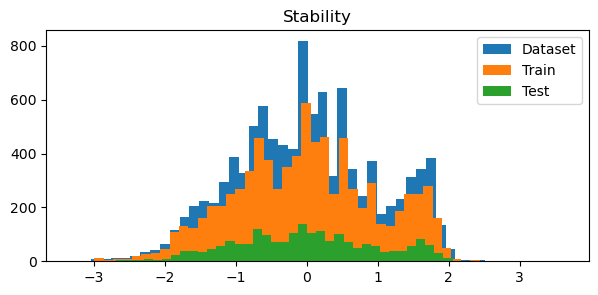

In [6]:
f, axs = plt.subplots(figsize=(7,3))

axs.hist(y, bins=50, label="Dataset")
axs.hist(y_train, bins=50, label="Train")
axs.hist(y_test, bins=50, label="Test")
axs.set_title("Stability")
axs.legend()
plt.show()

## Check diversity

In [7]:
diversity_dset = pd.read_csv(base_path / "stability_diversity.csv")
diversity_train = pd.read_csv(base_path / "stability_train_diversity.csv")
diversity_test = pd.read_csv(base_path / "stability_test_diversity.csv")

In [227]:
(diversity_train_sorted.diversity > 0.86).sum()

1803

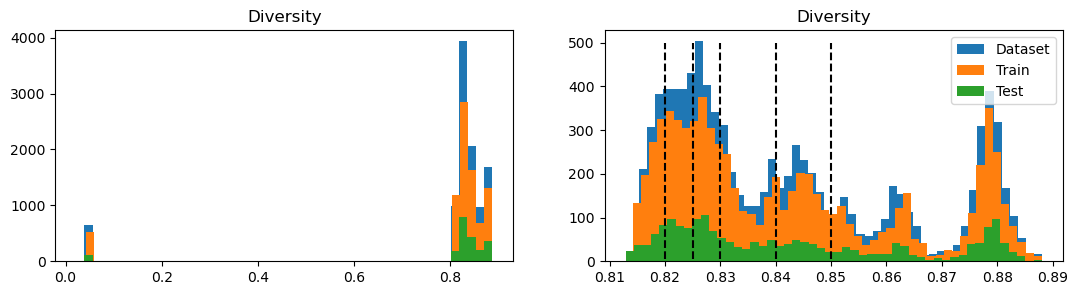

In [218]:
diversity_dset_sorted = diversity_dset.sort_values(by="diversity", ascending=True)
diversity_train_sorted = diversity_train.sort_values(by="diversity", ascending=True)
diversity_test_sorted = diversity_test.sort_values(by="diversity", ascending=True)

f, axs = plt.subplots(ncols=2, figsize=(13,3))

axs[0].hist(diversity_dset_sorted.diversity, bins=50, label="Dataset")
axs[0].hist(diversity_train_sorted.diversity, bins=50, label="Train")
axs[0].hist(diversity_test_sorted.diversity, bins=50, label="Test")
axs[0].set_title("Diversity")
# axs[0].legend()

axs[1].hist(diversity_dset_sorted.diversity[1000:], bins=50, label="Dataset")
axs[1].hist(diversity_train_sorted.diversity[700:], bins=50, label="Train")
axs[1].hist(diversity_test_sorted.diversity[150:], bins=50, label="Test")
axs[1].vlines([0.82, 0.825, 0.83, 0.84, 0.85], 5, 500, linestyles="dashed")
axs[1].set_title("Diversity")
axs[1].legend(loc=1)
plt.show()



## Check if all have h5py and diversity have the same order

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

bytes_to_str = lambda x : x.decode("utf8")
v_bytes_to_str = lambda x: list(np.vectorize(bytes_to_str)(x))

check_dups = lambda x, y: sum(x == y)
check_close = lambda x, y, *kw: sum(np.isclose(x, y, *kw))

scale_1d = lambda x: scaler.fit_transform(x.reshape(-1, 1)).reshape(-1)

### Full Dataset

#### Sequences

In [19]:
check_dups(df_dset.sequence.values, diversity_dset.sequence.values), \
check_dups(df_dset.sequence.values, v_bytes_to_str(dataset.sequences))

(10281, 10281)

#### Labels

In [20]:
y = scale_1d(df_dset.consensus_stability_score.values)
check_dups(df_dset.consensus_stability_score.values,diversity_dset.consensus_stability_score.values), \
check_close(y, dataset.y, 1e-04)

(10281, 10281)

### Train Set

#### Sequences

In [224]:
train_set = ProteinStabilityDataset(base_path / "stability_train.h5")
train_set.sequences

array([b'TELKKKLEEALKKGEEVRVKFNGIEIRNTSEDAARKAVELLEK',
       b'GSSQETIEVEDEEEARRVAKELRKTGYEVKIERRGNKWHVHRT',
       b'TTIHVGDLTLKYDNPKKAYEIAKKLAKKYNLQVTIKNGKITVT', ...,
       b'SKDEAQREAERAIRSGNKEEARRILEEAGYSPEQAERIARKLG',
       b'GSSKTQYEYDTKEEAQPAYEKFKKQGIPVTITQKNGKWFVQVE',
       b'GSSTTRYRFTDEEEARRAAKEWARRGYQNHVTQNGTYWEVEVR'], dtype=object)

In [33]:
check_dups(diversity_train.sequence.values, df_train.sequence.values), \
check_dups(diversity_train.sequence.values, v_bytes_to_str(train_set.sequences)), \
len(diversity_train)

(8204, 8204, 8204)

#### Labels

In [34]:
y = scale_1d(df_train.consensus_stability_score.values)
check_dups(df_train.consensus_stability_score.values, diversity_train.consensus_stability_score.values), \
check_close(y, train_set.y, 1e-04)

(8204, 8204)

### Test Set

In [35]:
check_dups(diversity_test.sequence.values, df_test.sequence.values), \
check_dups(diversity_test.sequence.values, v_bytes_to_str(test_set.sequences)), \
len(diversity_test)

(2077, 2077, 2077)

#### Labels

In [36]:
y = scale_1d(df_test.consensus_stability_score.values)
check_dups(df_test.consensus_stability_score.values, diversity_test.consensus_stability_score.values), \
check_close(y, test_set.y, 1e-04)

(2077, 2047)

## Check if embeddings have duplication

In [37]:
_, train_idxs, test_idxs = np.intersect1d(train_set.X, test_set.X, return_indices=True)
(train_idxs == test_idxs).sum()

0

## Check how does train/val split distributes stability and diversity

### Stability

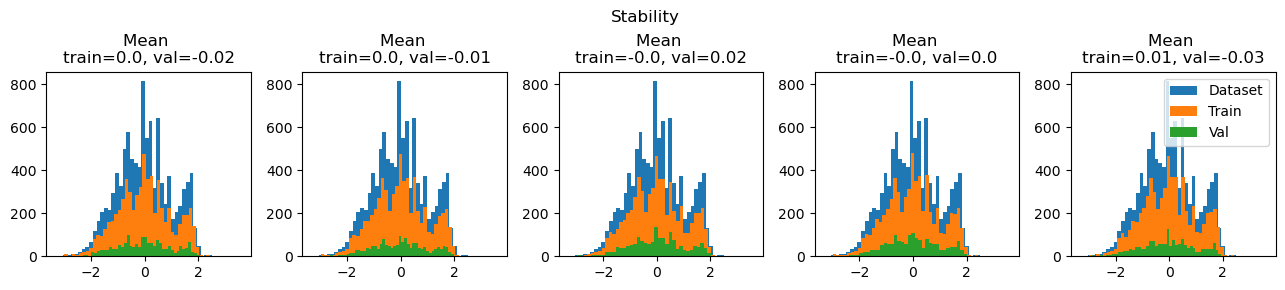

In [77]:
import torch

f, axs = plt.subplots(ncols=5, figsize=(13,3))

for ax in axs.flatten():
    dataset = ProteinStabilityDataset(base_path / "stability.h5" ,)
    train_set = ProteinStabilityDataset(base_path / "stability_train.h5")

    X, y = dataset.X, dataset.y

    train_set, val_set = torch.utils.data.random_split(
        train_set,
        lengths=[int(len(train_set) * 0.8), len(train_set) - int(len(train_set) * 0.8)],
    )

    _, y_train = train_set.dataset[train_set.indices] 
    _, y_val = val_set.dataset[val_set.indices]
    
    ax.hist(y, bins=50, label="Dataset")
    ax.hist(y_train, bins=50, label="Train")
    ax.hist(y_val, bins=50, label="Val")
    
    mean_train = torch.mean(y_train)
    mean_val = torch.mean(y_val)
    ax.set_title(f"Mean \ntrain={round(mean_train.item(), 2)}, val={round(mean_val.item(), 2)}")

f.suptitle("Stability")
f.tight_layout(rect=[0, 0.03, 1, 0.95])
ax.legend()
plt.show()

### Diversity

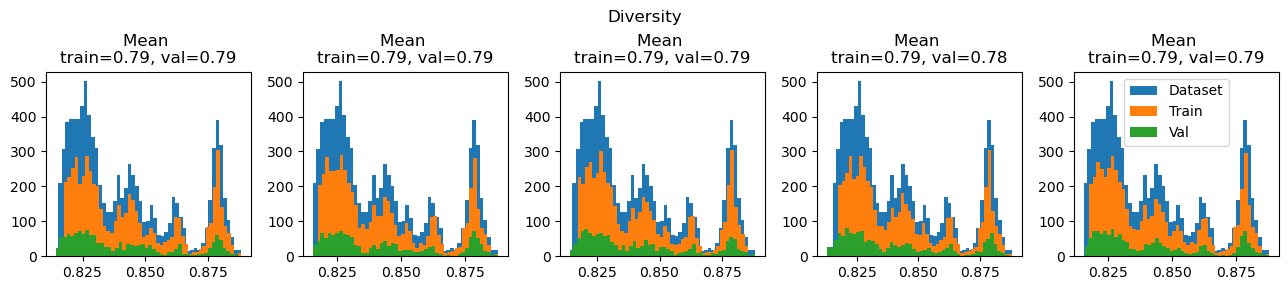

In [78]:
import torch

f, axs = plt.subplots(ncols=5, figsize=(13,3))

for ax in axs.flatten():
    dataset = ProteinStabilityDataset(base_path / "stability.h5", ret_dict=True)
    train_set = ProteinStabilityDataset(base_path / "stability_train.h5", ret_dict=True)

    X, y = dataset.X, dataset.y

    train_set, val_set = torch.utils.data.random_split(
        train_set,
        lengths=[int(len(train_set) * 0.8), len(train_set) - int(len(train_set) * 0.8)],
    )

    data_train = train_set.dataset[train_set.indices] 
    data_val = val_set.dataset[val_set.indices]
    
    seqs_train = v_bytes_to_str(data_train["sequences"])
    seqs_val = v_bytes_to_str(data_val["sequences"])
    subset_diversity_train = diversity_dset[diversity_dset.sequence.isin(seqs_train)]
    subset_diversity_val = diversity_dset[diversity_dset.sequence.isin(seqs_val)]
    subset_diversity_train = subset_diversity_train.sort_values(by="diversity", ascending=True)
    subset_diversity_val = subset_diversity_val.sort_values(by="diversity", ascending=True)
    
    ax.hist(diversity_dset_sorted.diversity[1000:], bins=50, label="Dataset")
    ax.hist(subset_diversity_train.diversity[900:], bins=50, label="Train")
    ax.hist(subset_diversity_val.diversity[150:], bins=50, label="Val")
    
    mean_train = subset_diversity_train.diversity.mean()
    mean_val = subset_diversity_val.diversity.mean()
    ax.set_title(f"Mean \ntrain={round(mean_train, 2)}, val={round(mean_val, 2)}")

f.suptitle("Diversity")
f.tight_layout(rect=[0, 0.03, 1, 0.95])
ax.legend()
plt.show()

#### Random Sampling

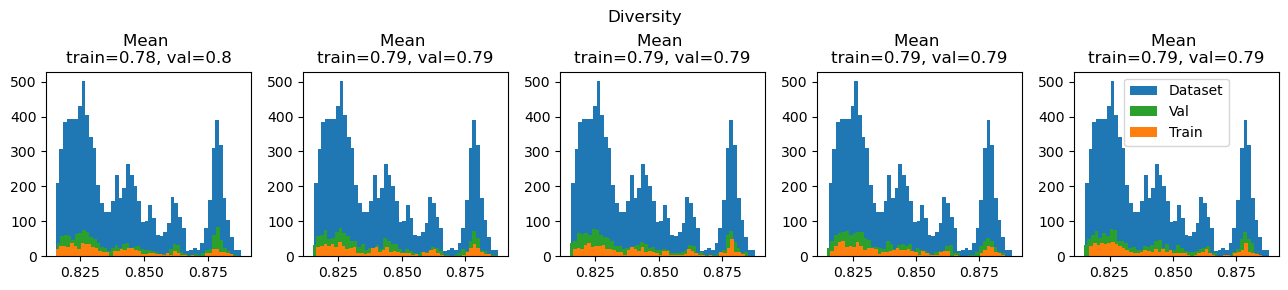

In [215]:
import torch

f, axs = plt.subplots(ncols=5, figsize=(13,3))

for ax in axs.flatten():
    full_dataset = ProteinStabilityDataset(base_path / "stability.h5", ret_dict=True)
    dataset = ProteinStabilityDataset(base_path / "stability_train.h5", ret_dict=True)

    X, y = full_dataset.X, full_dataset.y

    train_set, val_set = torch.utils.data.random_split(
        dataset,
        lengths=[int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)],
    )

    data_train = train_set.dataset[train_set.indices] 
    data_val = val_set.dataset[val_set.indices]

    train_size = len(train_set)
    train_indices = train_set.indices
    np.random.shuffle(train_indices)

    random_split_idx = int(np.floor(0.13 * train_size))
    sampler = torch.utils.data.SubsetRandomSampler(
        train_indices[:random_split_idx]
    )
    new_train_indices = train_indices[:random_split_idx]

    train_loader = torch.utils.data.DataLoader(
        dataset, batch_size=900, sampler=sampler
    )

    data_train = next(iter(train_loader))

    seqs_train = v_bytes_to_str(data_train["sequences"])
    seqs_val = v_bytes_to_str(data_val["sequences"])
    subset_diversity_train = diversity_dset[diversity_dset.sequence.isin(seqs_train)]
    subset_diversity_val = diversity_dset[diversity_dset.sequence.isin(seqs_val)]
    subset_diversity_train = subset_diversity_train.sort_values(by="diversity", ascending=True)
    subset_diversity_val = subset_diversity_val.sort_values(by="diversity", ascending=True)

    # check intersection
    if len(set(subset_diversity_train.sequence).intersection(set(subset_diversity_val.sequence))) != 0:
        print("train and val duplication")

    ax.hist(diversity_dset_sorted.diversity[1000:], bins=50, label="Dataset", color='#1f77b4')
    ax.hist(subset_diversity_val.diversity[150:], bins=50, label="Val", color='#2ca02c')
    ax.hist(subset_diversity_train.diversity[100:], bins=50, label="Train", color = '#ff7f0e')
    mean_train = subset_diversity_train.diversity.mean()
    mean_val = subset_diversity_val.diversity.mean()
    ax.set_title(f"Mean \ntrain={round(mean_train, 2)}, val={round(mean_val, 2)}")

f.suptitle("Diversity")
f.tight_layout(rect=[0, 0.03, 1, 0.95])
# handles, labels = ax.get_legend_handles_labels()
# # sort both labels and handles by labels
# handles, labels = handles[::-1], labels[::-1]
ax.legend()
plt.show()

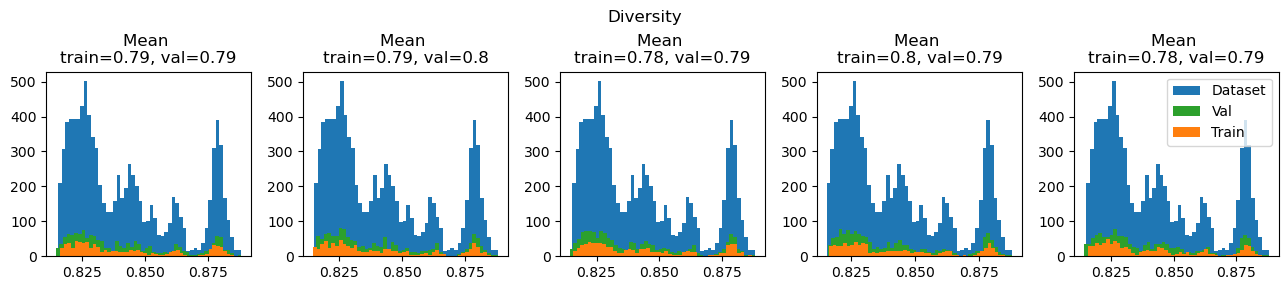

In [219]:
import torch

f, axs = plt.subplots(ncols=5, figsize=(13,3))

for ax in axs.flatten():
    full_dataset = ProteinStabilityDataset(base_path / "stability.h5", ret_dict=True)
    dataset = ProteinStabilityDataset(base_path / "stability_train.h5", ret_dict=True)

    X, y = full_dataset.X, full_dataset.y

    train_set, val_set = torch.utils.data.random_split(
        dataset,
        lengths=[int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)],
    )

    data_train = train_set.dataset[train_set.indices] 
    data_val = val_set.dataset[val_set.indices]

    train_size = len(train_set)
    train_indices = train_set.indices
    np.random.shuffle(train_indices)

    random_split_idx = int(np.floor(0.3 * train_size))
    sampler = torch.utils.data.SubsetRandomSampler(
        train_indices[:random_split_idx]
    )
    new_train_indices = train_indices[:random_split_idx]

    train_loader = torch.utils.data.DataLoader(
        dataset, batch_size=900, sampler=sampler
    )

    data_train = next(iter(train_loader))

    seqs_train = v_bytes_to_str(data_train["sequences"])
    seqs_val = v_bytes_to_str(data_val["sequences"])
    subset_diversity_train = diversity_dset[diversity_dset.sequence.isin(seqs_train)]
    subset_diversity_val = diversity_dset[diversity_dset.sequence.isin(seqs_val)]
    subset_diversity_train = subset_diversity_train.sort_values(by="diversity", ascending=True)
    subset_diversity_val = subset_diversity_val.sort_values(by="diversity", ascending=True)

    # check intersection
    if len(set(subset_diversity_train.sequence).intersection(set(subset_diversity_val.sequence))) != 0:
        print("train and val duplication")

    ax.hist(diversity_dset_sorted.diversity[1000:], bins=50, label="Dataset", color='#1f77b4')
    ax.hist(subset_diversity_val.diversity[150:], bins=50, label="Val", color='#2ca02c')
    ax.hist(subset_diversity_train.diversity[100:], bins=50, label="Train", color = '#ff7f0e')
    mean_train = subset_diversity_train.diversity.mean()
    mean_val = subset_diversity_val.diversity.mean()
    ax.set_title(f"Mean \ntrain={round(mean_train, 2)}, val={round(mean_val, 2)}")

f.suptitle("Diversity")
f.tight_layout(rect=[0, 0.03, 1, 0.95])
# handles, labels = ax.get_legend_handles_labels()
# # sort both labels and handles by labels
# handles, labels = handles[::-1], labels[::-1]
ax.legend(loc=1)
plt.show()